In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Using MPI version 4.1, 1 processes


In [2]:
# ___________________________________________________________________________
# Important Parameters

plt.rcParams['figure.dpi'] = 600

frames = [] # Image storage

inf = mp.inf

# Media

mediumIndex = 4
backgroundIndex = 1.44

medium= mp.Medium(index=mediumIndex)
background = mp.Medium(index=backgroundIndex)

# PML

thicknessPML = 3.0 # PML Thickess
pml_layers = [mp.PML(thicknessPML)]




In [3]:
# _______________________________________________________________________________________________
# A number of utility functions, supplied from https://humaticlabs.com/blog/meep-double-slit/, by Robert Taylor, but edited for gathering of data in pyplot.

# Label Plot
def label_plot(ax, title=None, xlabel=None, ylabel=None, elapsed=None):
    if title:
        ax.set_title(title)
    elif elapsed is not None:
        ax.set_title(f'{elapsed:0.1f} fs')
    if xlabel is not False:
        ax.set_xlabel('x (μm)'if xlabel is None else xlabel)
    if ylabel is not False:
        ax.set_ylabel('y (μm)'if ylabel is None else ylabel)

# Plot data of dielectric
def plot_eps_data(eps_data, domain, ax=None, **kwargs):
    ax = ax or plt.gca()
    label_plot(ax, **kwargs)
    return ax.imshow(eps_data.T, cmap='binary', extent=domain, origin='lower')

# Plot complex vectored E field data amplitude
def plot_ez_data(ez_data, domain, ax=None, vmax=None, aspect=None, **kwargs):
    ax = ax or plt.gca()
    label_plot(ax, **kwargs)
    return ax.imshow(
        np.abs(ez_data.T),
        interpolation='spline36',
        cmap='coolwarm',
        extent=domain,
        vmax=vmax,
        aspect=aspect,
        origin='lower',
        alpha=0.9
        )

# Define perfectly matched layers (border)
def plot_pml(pml_thickness, domain, ax=None):
    ax = ax or plt.gca()
    x_start = domain[0] + pml_thickness
    x_end = domain[1] - pml_thickness
    y_start = domain[2] + pml_thickness
    y_end = domain[3] - pml_thickness
    rect = plt.Rectangle(
        (x_start, y_start),
        x_end - x_start,
        y_end - y_start,
        fill=None,
        color='#000',
        linestyle='dashed',
        )
    return ax.add_patch(rect)

def plotData(eps_data,ez_data):
    frame = []
    ax = plt.gca()
    frame.append(plot_eps_data(eps_data, domain, ax=ax))
    frame.append(plot_ez_data(ez_data, domain, ax=ax))
    frame.append(plot_pml(thicknessPML, domain, ax=ax))
    return frame
    

def plotEPS(Sim, todo):
    if todo == 'step':
        eps_data = Sim.get_array(center=mp.Vector3(), size=cellSize, component=mp.Dielectric)
        ez_data = Sim.get_array(center=mp.Vector3(), size=cellSize, component=mp.Ez)
        frame = plotData(eps_data,ez_data)
        frames.append(frame)
        fig, ax = plt.subplots()
        ax = frame
        fig

# _______________________________________________________________________________________________

0.1
     block, center = (0,6.77,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


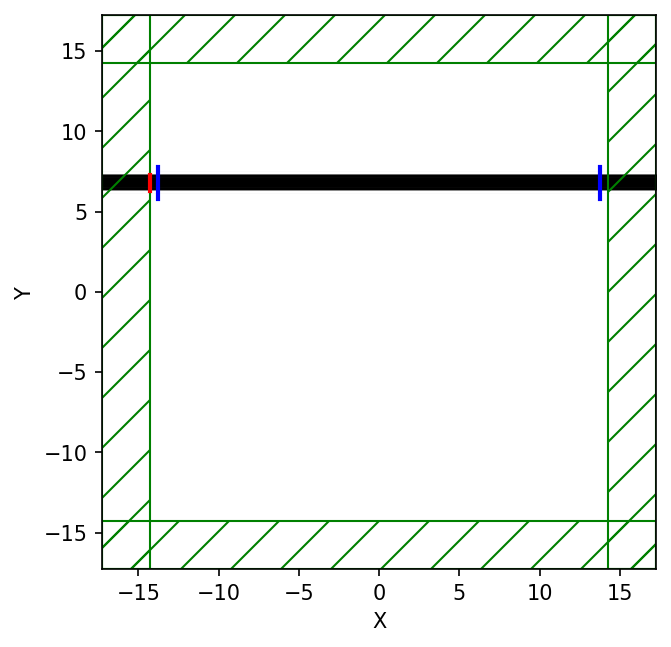

-----------
Initializing structure...
time for choose_chunkdivision = 0.000176201 s
Working in 2D dimensions.
Computational cell is 34.5 x 34.5 x 0 with resolution 10
     block, center = (0,6.77,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.100984 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 445.95000000000005/2500.0 = 17.8% done in 4.0s, 18.4s to go
on time step 8927 (time=446.35), 0.000448096 s/step
Meep progress: 889.8000000000001/2500.0 = 35.6% done in 8.0s, 14.5s to go
on time step 17806 (time=890.3), 0.000450541 s/step
Meep progress: 1332.0/2500.0 = 53.3% done in 12.0s, 10.5s to go
on time step 26650 (time=1332.5), 0.000452294 s/step
Meep progress: 1762.5500000000002/2500.0 = 70.5% done in 16.0s, 6.7s to go
on time step 35263 (time=1763.15), 0.000464478 s/step
Meep progress: 2153.55/2500.0 = 86.1% done in 20.0s, 3.2s to go
on time step 43086 (time=2154.3), 0.000511338 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0003027 s
Working in 2D dimensions.
Computational cell is 34.5 x 34.5 x 0 with resolution 10
     block, center = (0,6.77,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-6.77,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.242739 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 403.85/2500.0 = 16.2% done in 4.0s, 20.8s to go
on time step 8084 (time=404.2), 0.000494866 s/step
Meep progress: 801.45/2500.0 = 32.1% done in 8.0s, 17.0s to go
on time step 16037 (time=801.85), 0.000503013 s/step
Meep progress: 1190.7/2500.0 = 47.6% done in 12.0s, 13.2s to go
on time step 23825 (time=1191.25), 0.000513619 s/step
Meep progress: 1567.1000000000001/2500.0 = 62.7% done in 16.0s, 9.5s to go
on time step 31355 (time=1567.75), 0.000531216 s/step
Meep progress: 2017.75/2500.0 = 80.7% done in 20.0s, 4.8s to go
on time step 40369 (time=2018.45), 0.000443769 s/step
Meep progress: 2463.9500000000003/2500.0 = 98.6% done in 24.0s, 0.4s to go
on time step 49296 (time=2464.8), 0.000448119 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,6.77,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-6.77,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


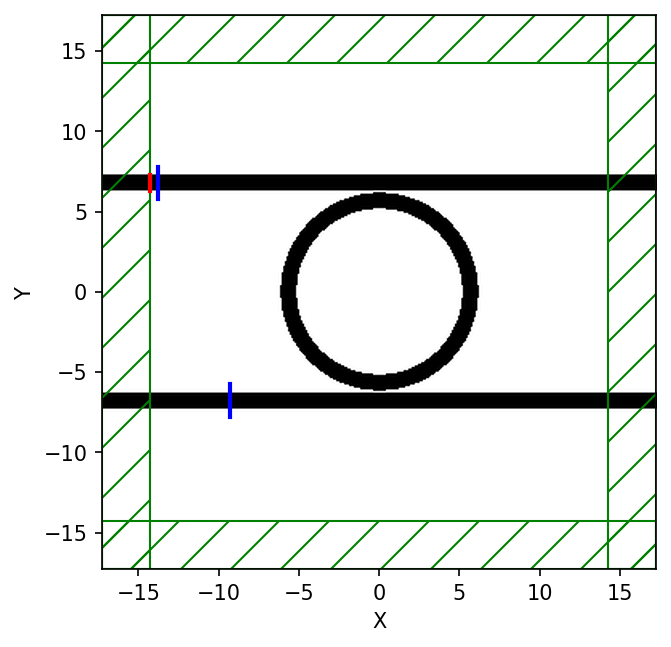

0.2
     block, center = (0,6.87,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


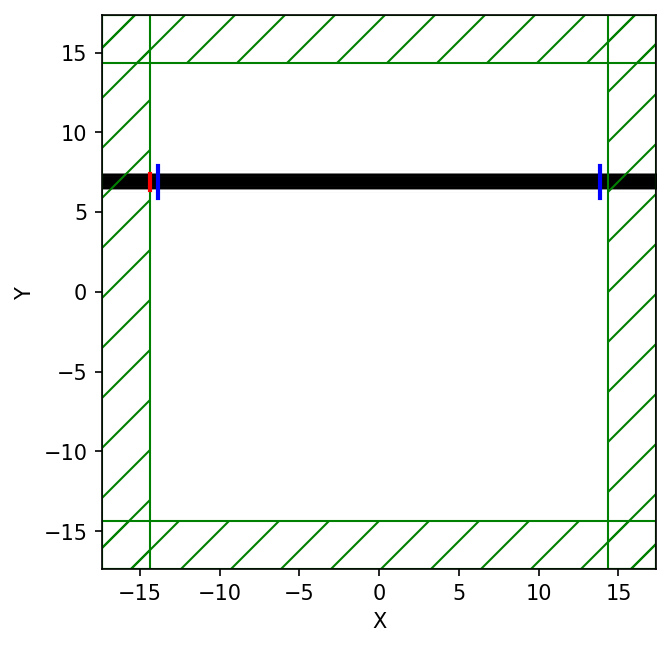

-----------
Initializing structure...
time for choose_chunkdivision = 0.0001761 s
Working in 2D dimensions.
Computational cell is 34.7 x 34.7 x 0 with resolution 10
     block, center = (0,6.87,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.102969 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 437.15000000000003/2500.0 = 17.5% done in 4.0s, 18.9s to go
on time step 8749 (time=437.45), 0.000457228 s/step
Meep progress: 872.9000000000001/2500.0 = 34.9% done in 8.0s, 14.9s to go
on time step 17465 (time=873.25), 0.000458934 s/step
Meep progress: 1321.0/2500.0 = 52.8% done in 12.0s, 10.7s to go
on time step 26428 (time=1321.4), 0.000446295 s/step
Meep progress: 1758.75/2500.0 = 70.3% done in 16.0s, 6.7s to go
on time step 35184 (time=1759.2), 0.000456834 s/step
Meep progress: 2200.1/2500.0 = 88.0% done in 20.0s, 2.7s to go
on time step 44013 (time=2200.65), 0.000453093 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000191 s
Working in 2D dimensions.
Computational cell is 34.7 x 34.7 x 0 with resolution 10
     block, center = (0,6.87,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-6.87,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.209912 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 373.75/2500.0 = 14.9% done in 4.0s, 22.8s to go
on time step 7487 (time=374.35), 0.000534321 s/step
Meep progress: 761.5/2500.0 = 30.5% done in 8.0s, 18.3s to go
on time step 15242 (time=762.1), 0.000515803 s/step
Meep progress: 1151.5/2500.0 = 46.1% done in 12.0s, 14.1s to go
on time step 23044 (time=1152.2), 0.000512723 s/step
Meep progress: 1536.65/2500.0 = 61.5% done in 16.0s, 10.0s to go
on time step 30746 (time=1537.3), 0.000519358 s/step
Meep progress: 1925.5500000000002/2500.0 = 77.0% done in 20.0s, 6.0s to go
on time step 38529 (time=1926.45), 0.000513957 s/step
Meep progress: 2312.5/2500.0 = 92.5% done in 24.0s, 1.9s to go
on time step 46270 (time=2313.5), 0.000516774 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,6.87,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-6.87,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


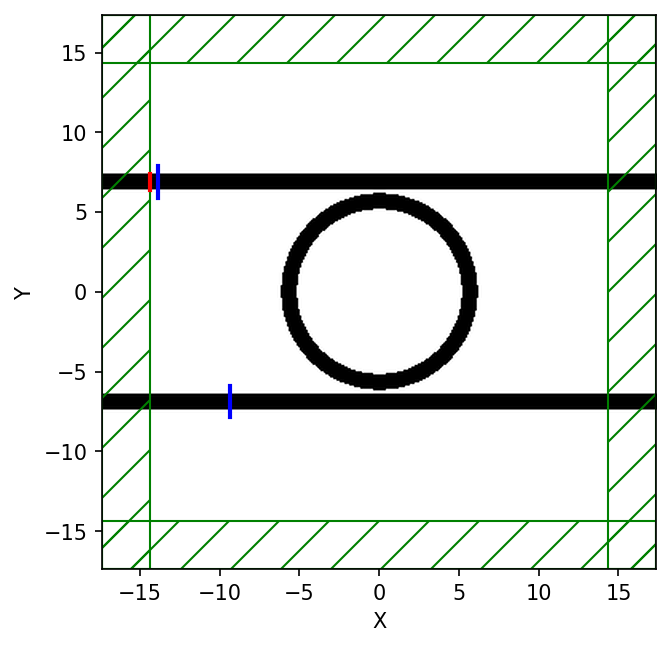

0.3
     block, center = (0,6.97,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


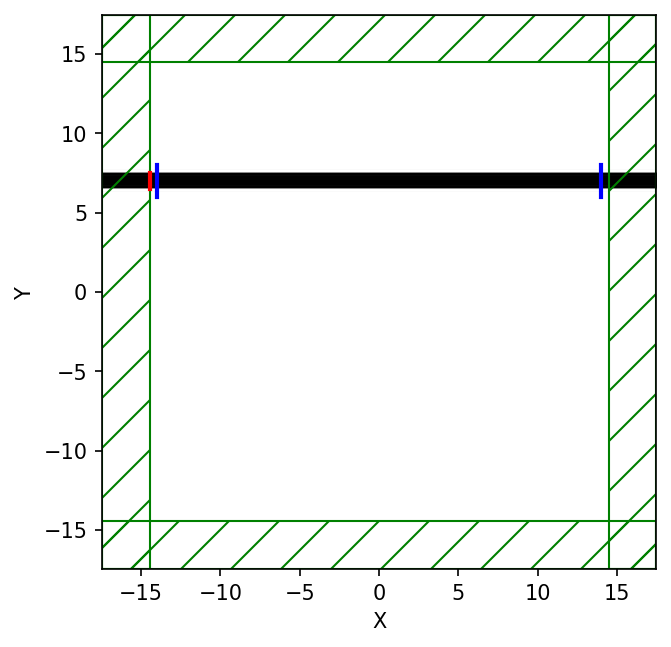

-----------
Initializing structure...
time for choose_chunkdivision = 0.000176 s
Working in 2D dimensions.
Computational cell is 34.9 x 34.9 x 0 with resolution 10
     block, center = (0,6.97,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.104526 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 386.1/2500.0 = 15.4% done in 4.0s, 21.9s to go
on time step 7727 (time=386.35), 0.00051769 s/step
Meep progress: 767.6500000000001/2500.0 = 30.7% done in 8.0s, 18.1s to go
on time step 15360 (time=768), 0.000524091 s/step
Meep progress: 1155.4/2500.0 = 46.2% done in 12.0s, 14.0s to go
on time step 23117 (time=1155.85), 0.000515682 s/step
Meep progress: 1544.3000000000002/2500.0 = 61.8% done in 16.0s, 9.9s to go
on time step 30897 (time=1544.85), 0.000514233 s/step
Meep progress: 1928.95/2500.0 = 77.2% done in 20.0s, 5.9s to go
on time step 38590 (time=1929.5), 0.000519971 s/step
Meep progress: 2311.4500000000003/2500.0 = 92.5% done in 24.0s, 2.0s to go
on time step 46242 (time=2312.1), 0.000522745 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002148 s
Working in 2D dimensions.
Computational cell is 34.9 x 34.9 x 0 with resolution 10
     block, center = (0,6.97,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-6.97,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.213777 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 389.05/2500.0 = 15.6% done in 4.0s, 21.7s to go
on time step 7794 (time=389.7), 0.000513353 s/step
Meep progress: 771.0/2500.0 = 30.8% done in 8.0s, 17.9s to go
on time step 15439 (time=771.95), 0.000523272 s/step
Meep progress: 1182.9/2500.0 = 47.3% done in 12.0s, 13.4s to go
on time step 23678 (time=1183.9), 0.000485514 s/step
Meep progress: 1598.5500000000002/2500.0 = 63.9% done in 16.0s, 9.0s to go
on time step 31992 (time=1599.6), 0.00048113 s/step
Meep progress: 1993.2/2500.0 = 79.7% done in 20.0s, 5.1s to go
on time step 39885 (time=1994.25), 0.000506779 s/step
Meep progress: 2393.7000000000003/2500.0 = 95.7% done in 24.0s, 1.1s to go
on time step 47888 (time=2394.4), 0.00049988 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,6.97,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-6.97,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


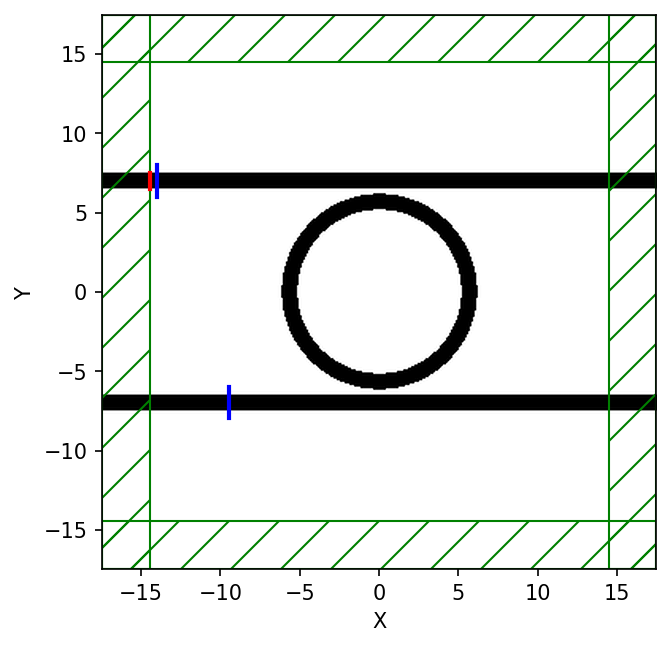

0.4
     block, center = (0,7.07,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


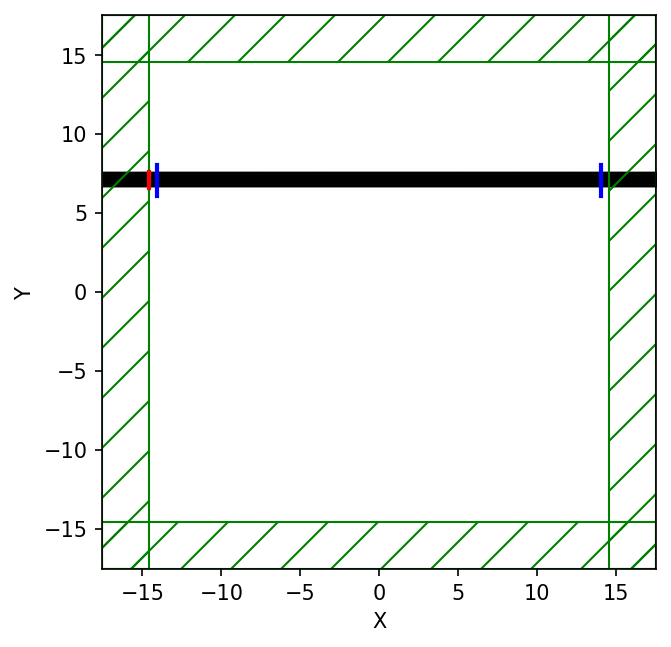

-----------
Initializing structure...
time for choose_chunkdivision = 0.0001779 s
Working in 2D dimensions.
Computational cell is 35.1 x 35.1 x 0 with resolution 10
     block, center = (0,7.07,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.1049 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 415.3/2500.0 = 16.6% done in 4.0s, 20.1s to go
on time step 8309 (time=415.45), 0.000481423 s/step
Meep progress: 825.7/2500.0 = 33.0% done in 8.0s, 16.2s to go
on time step 16520 (time=826), 0.000487161 s/step
Meep progress: 1246.1000000000001/2500.0 = 49.8% done in 12.0s, 12.1s to go
on time step 24930 (time=1246.5), 0.000475631 s/step
Meep progress: 1645.8500000000001/2500.0 = 65.8% done in 16.0s, 8.3s to go
on time step 32926 (time=1646.3), 0.000500262 s/step
Meep progress: 2064.85/2500.0 = 82.6% done in 20.0s, 4.2s to go
on time step 41307 (time=2065.35), 0.000477289 s/step
Meep progress: 2461.9/2500.0 = 98.5% done in 24.0s, 0.4s to go
on time step 49248 (time=2462.4), 0.000503811 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002005 s
Working in 2D dimensions.
Computational cell is 35.1 x 35.1 x 0 with resolution 10
     block, center = (0,7.07,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-7.07,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.230291 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 398.5/2500.0 = 15.9% done in 4.0s, 21.1s to go
on time step 7978 (time=398.9), 0.00050139 s/step
Meep progress: 783.85/2500.0 = 31.4% done in 8.0s, 17.5s to go
on time step 15686 (time=784.3), 0.000518956 s/step
Meep progress: 1182.2/2500.0 = 47.3% done in 12.0s, 13.4s to go
on time step 23653 (time=1182.65), 0.000502087 s/step
Meep progress: 1588.0/2500.0 = 63.5% done in 16.0s, 9.2s to go
on time step 31775 (time=1588.75), 0.000492535 s/step
Meep progress: 1989.8000000000002/2500.0 = 79.6% done in 20.0s, 5.1s to go
on time step 39812 (time=1990.6), 0.00049775 s/step
Meep progress: 2394.05/2500.0 = 95.8% done in 24.0s, 1.1s to go
on time step 47895 (time=2394.75), 0.000494901 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,7.07,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-7.07,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


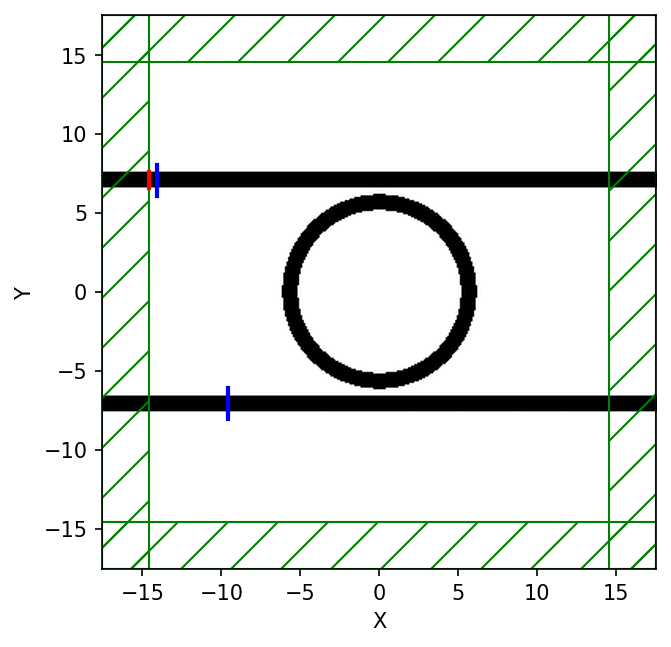

0.5
     block, center = (0,7.17,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


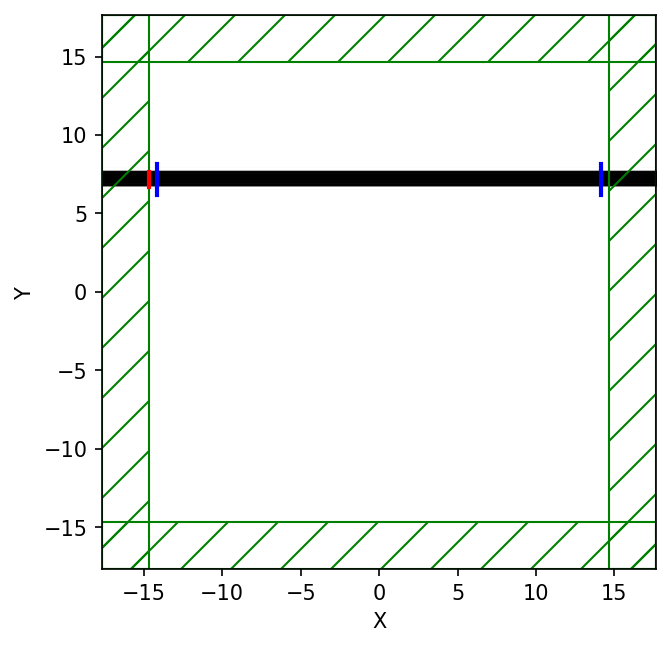

-----------
Initializing structure...
time for choose_chunkdivision = 0.0001792 s
Working in 2D dimensions.
Computational cell is 35.3 x 35.3 x 0 with resolution 10
     block, center = (0,7.17,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.118965 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 389.35/2500.0 = 15.6% done in 4.0s, 21.7s to go
on time step 7792 (time=389.6), 0.000513411 s/step
Meep progress: 772.0/2500.0 = 30.9% done in 8.0s, 17.9s to go
on time step 15448 (time=772.4), 0.00052252 s/step
Meep progress: 1143.7/2500.0 = 45.7% done in 12.0s, 14.2s to go
on time step 22882 (time=1144.1), 0.000538078 s/step
Meep progress: 1536.8500000000001/2500.0 = 61.5% done in 16.0s, 10.0s to go
on time step 30748 (time=1537.4), 0.00050863 s/step
Meep progress: 1933.8500000000001/2500.0 = 77.4% done in 20.0s, 5.9s to go
on time step 38690 (time=1934.5), 0.000503709 s/step
Meep progress: 2330.75/2500.0 = 93.2% done in 24.0s, 1.7s to go
on time step 46629 (time=2331.45), 0.000503893 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002014 s
Working in 2D dimensions.
Computational cell is 35.3 x 35.3 x 0 with resolution 10
     block, center = (0,7.17,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-7.17,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.213213 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 423.0/2500.0 = 16.9% done in 4.0s, 19.6s to go
on time step 8469 (time=423.45), 0.000472361 s/step
Meep progress: 843.75/2500.0 = 33.8% done in 8.0s, 15.7s to go
on time step 16886 (time=844.3), 0.000475273 s/step
Meep progress: 1269.5500000000002/2500.0 = 50.8% done in 12.0s, 11.6s to go
on time step 25397 (time=1269.85), 0.000470006 s/step
Meep progress: 1667.1000000000001/2500.0 = 66.7% done in 16.0s, 8.0s to go
on time step 33352 (time=1667.6), 0.000502842 s/step
Meep progress: 2061.55/2500.0 = 82.5% done in 20.0s, 4.3s to go
on time step 41240 (time=2062), 0.000507103 s/step
Meep progress: 2455.25/2500.0 = 98.2% done in 24.0s, 0.4s to go
on time step 49114 (time=2455.7), 0.000508017 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,7.17,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,0,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-7.17,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


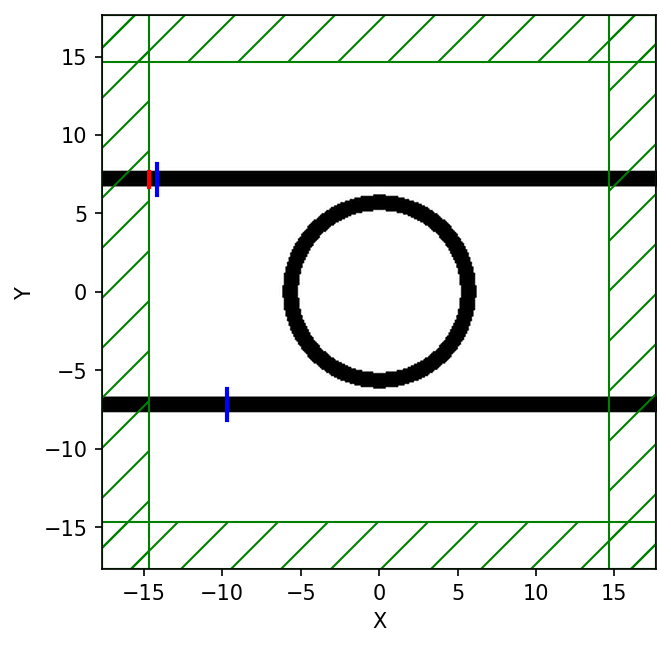

In [4]:
radii = 0 # This parameter was used to vary radii but is not currently used
gaps = 5 # Divide w_unit into this many slcies

wl = [None for j in range(gaps)]
Rs = [None for j in range(gaps)]
Ts = [None for j in range(gaps)]

nfreq = 1000 # Number of frequency components in Fourier Transform

for gap in range(gaps):
    # Controls
    
    radiusControl = 6.17
    gapControl = (gap + 1)/(gaps*2)
    print(gapControl)
    heightSpacing = 10
    widthSpacing = 10
    
    # Dieletric Geometry
    guideWidth = 1
    ringRadius = radiusControl*guideWidth
    guideRingGap = guideWidth*gapControl
    
    # Borders
    
    borderPadding = 2*thicknessPML
    cellHeight = 2*(ringRadius + guideRingGap + guideWidth + heightSpacing)
    cellWidth = 2*(ringRadius + guideRingGap + guideWidth + widthSpacing)
    
    cellSize = mp.Vector3(cellWidth, cellHeight)

    # Domain Data
    domain = [0, cellWidth, 0, cellHeight]
    center = mp.Vector3(
        (domain[1] + domain[0]) / 2,
        (domain[3] + domain[2]) / 2,
        )
    cell_size = mp.Vector3(
        domain[1] - domain[0],
        domain[3] - domain[2],
        )

    # Wave Source

    wavelength = 1.55*mediumIndex
    frequencyCenter = 1/wavelength
    bandwidth = 0.05 # 3xWavelength maximum integer before distortion at extremities
    
    sourceX = -(cellWidth)/2 + thicknessPML
    sourceY = ringRadius + guideRingGap + guideWidth/2

    # Guide Controls ______________________________________________________________________________________

    const = 0.125

    constGuide = ringRadius + guideWidth/2 + const # For altering only one radius, must swap out in below variables
    
    guideBottom = sourceY

    guideTop = sourceY
    
    sources = [
        mp.Source(
            mp.GaussianSource(frequencyCenter, fwidth=bandwidth), # fwidth=bandwidth
            component=mp.Ez,
            center=mp.Vector3(sourceX, guideTop, 0),
            size=mp.Vector3(0, guideWidth, 0),
        )
    ]

    # Geometry ____________________________________________________________________________________________

    geometry = [
        mp.Block(
            size=mp.Vector3(inf, guideWidth, 1),
            center=mp.Vector3(0, guideTop, 0),
            material=medium,
        ),
    ]

    # Simulation Setup

    sim = mp.Simulation(
        cell_size=cellSize,
        boundary_layers=pml_layers,
        geometry=geometry,
        sources=sources,
        resolution=10,
        default_material=background
    )

    # Reflected Flux
    reflected = mp.FluxRegion(center=mp.Vector3(sourceX + 0.5, guideTop, 0), 
                             size=mp.Vector3(0, 2*guideWidth, 0)
                            )
    reflectedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, reflected)
    
    # Transmitted Flux
    transmitted = mp.FluxRegion(center=mp.Vector3(-sourceX-0.5,guideTop,0),
                                size=mp.Vector3(0,2*guideWidth,0)
                               )
    transmittedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, transmitted)
    
    # Display Dielectric
    plt.figure(dpi=150)
    sim.plot2D()
    plt.show()

    # Calculate Flux

    sim.run(until=2500)
    
    straightReflectedData = sim.get_flux_data(reflectedFourier)

    straightTransmittedFlux = mp.get_fluxes(transmittedFourier)

    # Compare Unit against new structure

    sim.reset_meep() #_________________________________________________________________________________________________________________________________
    
    # Geometry
    
    geometry = [
        mp.Block(
            size=mp.Vector3(inf, guideWidth, inf),
            center=mp.Vector3(0, guideTop, 0),
            material=medium,
            ),
        mp.Cylinder(ringRadius, material=medium),
        mp.Cylinder(ringRadius-guideWidth, material=background),
        mp.Block(
            size=mp.Vector3(inf, guideWidth, inf),
            center=mp.Vector3(0, -guideBottom, 0),
            material=medium
            ),
    ]
    
    sim = mp.Simulation(cell_size=cellSize,
                        boundary_layers=pml_layers,
                        geometry=geometry,
                        sources=sources,
                        resolution=10,
                        default_material=background
                       )
    # Reflected Flux
    reflectedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, reflected)
    
    transmitted = mp.FluxRegion(center=mp.Vector3(sourceX+5,-guideBottom, 0), 
                                size=mp.Vector3(0, 2*guideWidth, 0)
                               )
    transmittedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, transmitted)
    
    sim.load_minus_flux_data(reflectedFourier, straightReflectedData)
    
    sim.run(until=2500) # change to "mp.at_every(n, plotEPS), until 2500" to plot the simulation at every n time units. Same goes for the straight waveguide. 
    
    nextReflectedFlux = mp.get_fluxes(reflectedFourier)
    nextTransmittedFlux = mp.get_fluxes(transmittedFourier)
    
    fluxFrequencies = mp.get_flux_freqs(reflectedFourier)
    
    plt.figure(dpi=150)
    sim.plot2D()
    plt.show()

    for i in range(nfreq):
        wl[gap] = np.append(wl[gap], 1 / fluxFrequencies[i])
        Rs[gap] = np.append(Rs[gap], -nextReflectedFlux[i] / straightTransmittedFlux[i])
        Ts[gap] = np.append(Ts[gap], -nextTransmittedFlux[i] / straightTransmittedFlux[i])

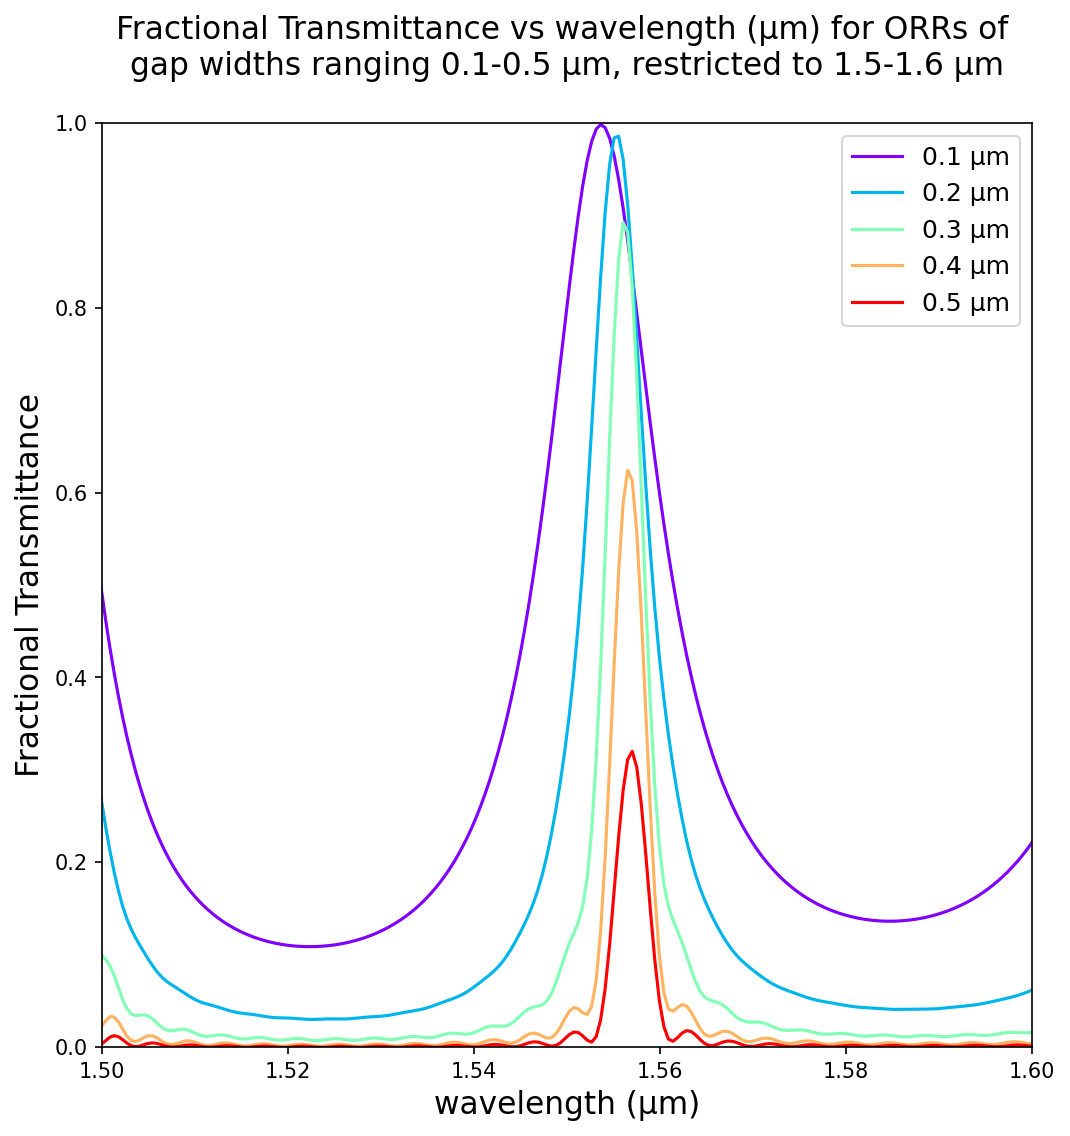

In [5]:
plt.figure(figsize=(8, 8), dpi=150)

color = plt.cm.rainbow(np.linspace(0, 1, gaps))

for gap, c in enumerate(color):
    if mp.am_master():
        x = wl[gap][1:]
        
        x = [i/mediumIndex for i in x]
        
        plt.plot(x, Ts[gap][1:], c=c, label=f"{round((gap + 1)/(gaps*2),3)} μm", markersize=1, linewidth=1.5)
        #plt.plot(x, Rs[gap][1:], c=c, label=f"{round((gap + 1)/(gaps),3)} μm Reflectance" , markersize=0, linewidth=1) - Reflectance, not plotted for clarity
        np.savetxt(f"plot{gap}.csv", (x,Ts[gap][1:]), delimiter=',')
plt.axis([1.5, 1.6, 0, 1])
plt.title("Fractional Transmittance vs wavelength (μm) for ORRs of \ngap widths ranging 0.1-0.5 μm, restricted to 1.5-1.6 μm\n", fontsize=15) # , restricted to 1.5-1.6 μm
plt.xlabel("wavelength (μm)", fontsize=15)
plt.ylabel("Fractional Transmittance", fontsize=15)
plt.legend(loc="best", prop={'size': 12})
plt.savefig("0.1-0.5_1Circle.pdf", bbox_inches='tight', format="pdf") # Save figure, must manually update title or will overwrite. Could easily make automatic like CSV but proved unnecessary in usage.
plt.show()